<h1>DRV Analysis</h1>

In [1]:
from properties import rit_models, l_ax_standard, w_ax_step_param_standard, save_w_ax_standard, l_pmos_q_standard, w_pmos_q_standard, l_nmos_q_standard, w_nmos_q_standard, l_pmos_q_neg_standard, w_pmos_q_neg_standard, l_nmos_q_neg_standard, w_nmos_q_neg_standard, dc_vsweep_standard, vdd_standard, vsweep_standard
from properties import l_ax_seevinck, w_ax_step_param_seevinck, save_w_ax_seevinck, l_pmos_q_seevinck, w_pmos_q_seevinck, l_nmos_q_seevinck, w_nmos_q_seevinck, l_pmos_q_neg_seevinck, w_pmos_q_neg_seevinck, l_nmos_q_neg_seevinck, w_nmos_q_neg_seevinck, dc_vsweep_seevinck, vdd_seevinck, vsweep_seevinck, e1_seevinck, e2_seevinck, e3_seevinck, e4_seevinck, e5_seevinck, e6_seevinck, e7_seevinck, e8_seevinck
from properties import rit_models_montecarlo, l_ax_gaussian_vth, w_ax_step_param_gaussian_vth, save_w_ax_gaussian_vth, l_pmos_q_gaussian_vth, w_pmos_q_gaussian_vth, l_nmos_q_gaussian_vth, w_nmos_q_gaussian_vth, l_pmos_q_neg_gaussian_vth, w_pmos_q_neg_gaussian_vth, l_nmos_q_neg_gaussian_vth, w_nmos_q_neg_gaussian_vth, dc_vsweep_gaussian_vth, vdd_gaussian_vth, vsweep_gaussian_vth, e1_gaussian_vth, e2_gaussian_vth, e3_gaussian_vth, e4_gaussian_vth, e5_gaussian_vth, e6_gaussian_vth, e7_gaussian_vth, e8_gaussian_vth, step_param_run_gaussian_vth, w_ax_gaussian_vth
from utils.path import ltspice, schematics, images, data
from utils.check import check_output_image
from utils.patterns import w_ax_standard_pattern
import re
from models.ops import load_asc, load_ltr
from PyLTSpice import SimRunner
import matplotlib.pyplot as plt
import os

<h2>SNM Standard Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/hold/standard_hold.asc


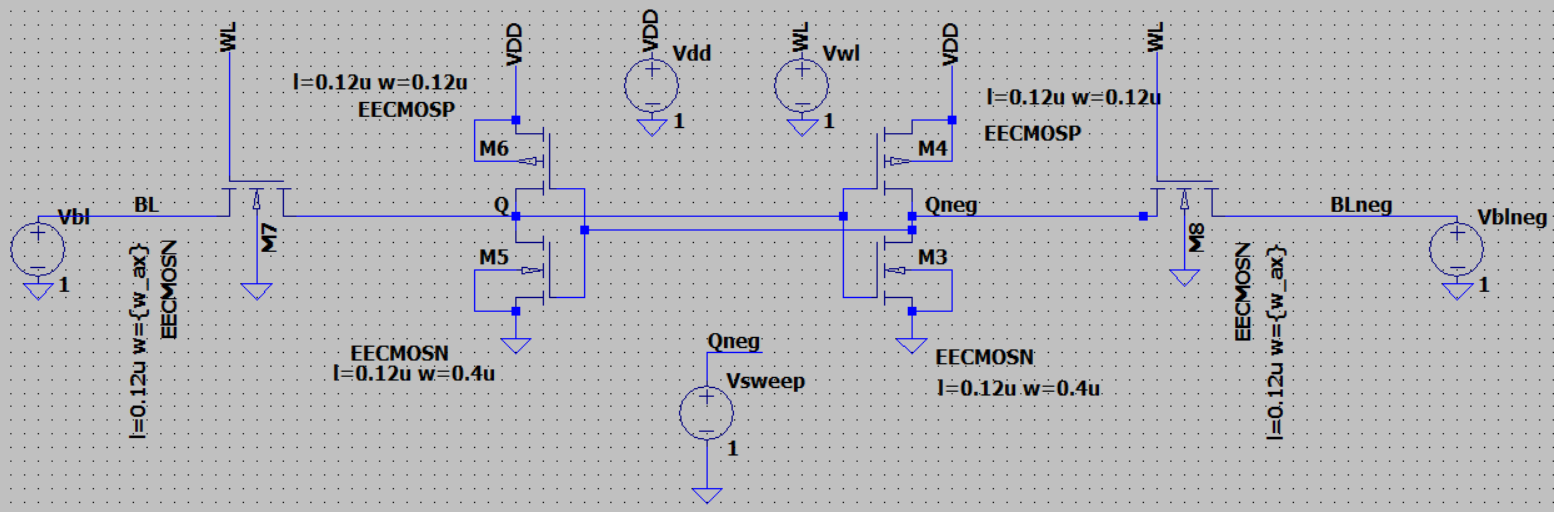

Successful/Total Simulations: 0/1
Raw file: data\standard\hold\standard_hold_1.raw, Log file: data\standard\hold\standard_hold_1.log
File opened successfully: data\standard\hold\standard_hold_1.raw
File updated successfully: ../../images/standard_hold_simulation.png


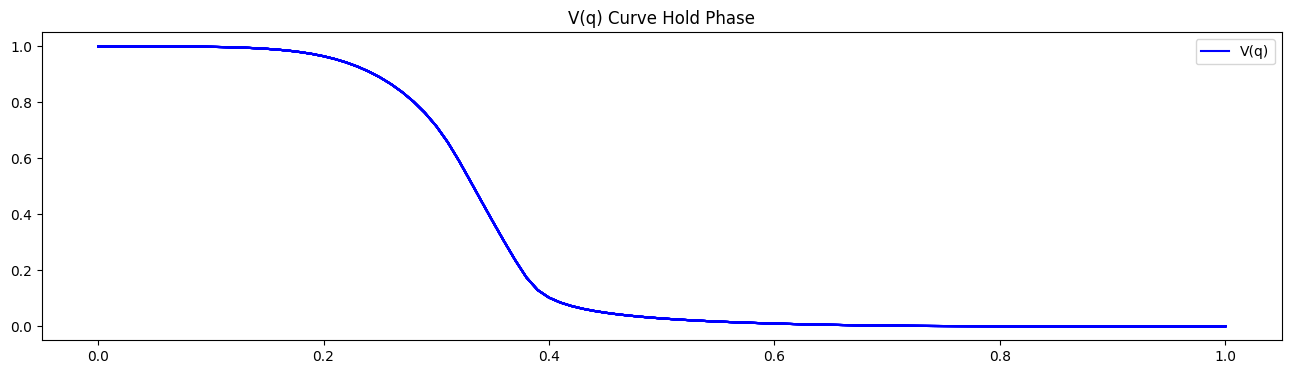

In [2]:
standard_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "standard/hold/standard_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "standard.png")
                                )
vwl='0'; vbl='1'; vblneg='1'
standard_hold_netlist.set_parameter('l_ax', l_ax_standard)
standard_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_hold_netlist.set_parameter('vdd', vdd_standard)
standard_hold_netlist.set_parameter('vwl', vwl)
standard_hold_netlist.set_parameter('vbl', vbl)
standard_hold_netlist.set_parameter('vblneg', vblneg)
standard_hold_netlist.set_parameter('vsweep', vsweep_standard)
standard_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_hold_runner = SimRunner(output_folder=f"{data}/standard/hold/")
standard_hold_runner.run(netlist=standard_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_hold_runner.okSim) + '/' + str(standard_hold_runner.runno))

standard_hold_raw = ""
standard_hold_log = ""
for standard_hold_raw, standard_hold_log in standard_hold_runner:
    print("Raw file: %s, Log file: %s" % (standard_hold_raw, standard_hold_log))

standard_hold_ltr = load_ltr(raw_file_path=standard_hold_raw)
v_q_standard_hold = standard_hold_ltr.get_trace("V(q)")
vsweep_standard_hold = standard_hold_ltr.get_trace('vsweep')
steps = standard_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_standard_hold.get_wave(step), v_q_standard_hold.get_wave(step), label=steps[step], color='blue')
plt.title("V(q) Curve Hold Phase")
plt.legend(["V(q)"])
standard_hold_simulation_path_image = os.path.join(images, "standard_hold_simulation.png")
check_output_image(standard_hold_simulation_path_image)
plt.savefig(standard_hold_simulation_path_image)
plt.show()

w_ax_standard_hold = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_hold.png


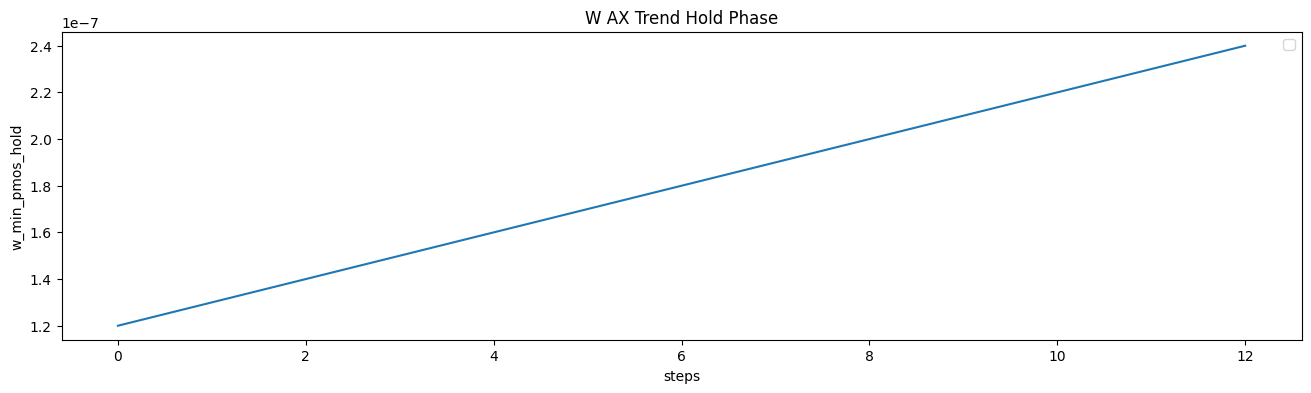

In [3]:
standard_hold_log_file_path = f"./{standard_hold_log}"

with open(standard_hold_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_hold_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_hold_lines = w_ax_standard_hold_data.strip().split('\n')[1:]
w_ax_standard_hold = [float(line.split('\t')[1]) for line in w_ax_standard_hold_lines]

print(f'w_ax_standard_hold = {w_ax_standard_hold}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_hold'])
plt.plot(w_ax_standard_hold, label='w_ax_standard_hold')
plt.ylabel('w_min_pmos_hold'); plt.xlabel('steps'); plt.title('W AX Trend Hold Phase')
w_ax_standard_hold_path_image = os.path.join(images, "w_ax_standard_hold.png")
check_output_image(w_ax_standard_hold_path_image)
plt.savefig(w_ax_standard_hold_path_image)
plt.show()

File updated successfully: ../../images/butterfly_curve_standard_hold.png


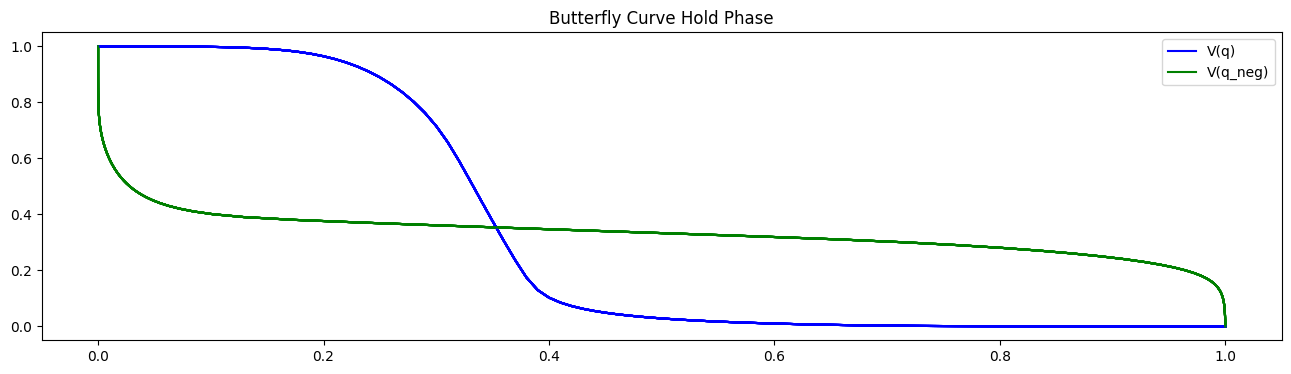

In [4]:
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_standard_hold.get_wave(step), v_q_standard_hold.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_standard_hold.get_wave(step), vsweep_standard_hold.get_wave(step), label=steps[step], color='green')
plt.title("Butterfly Curve Hold Phase")
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_standard_hold_path_image = os.path.join(images, "butterfly_curve_standard_hold.png")
check_output_image(butterfly_curve_standard_hold_path_image)
plt.savefig(butterfly_curve_standard_hold_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/standard/read/standard_read.asc


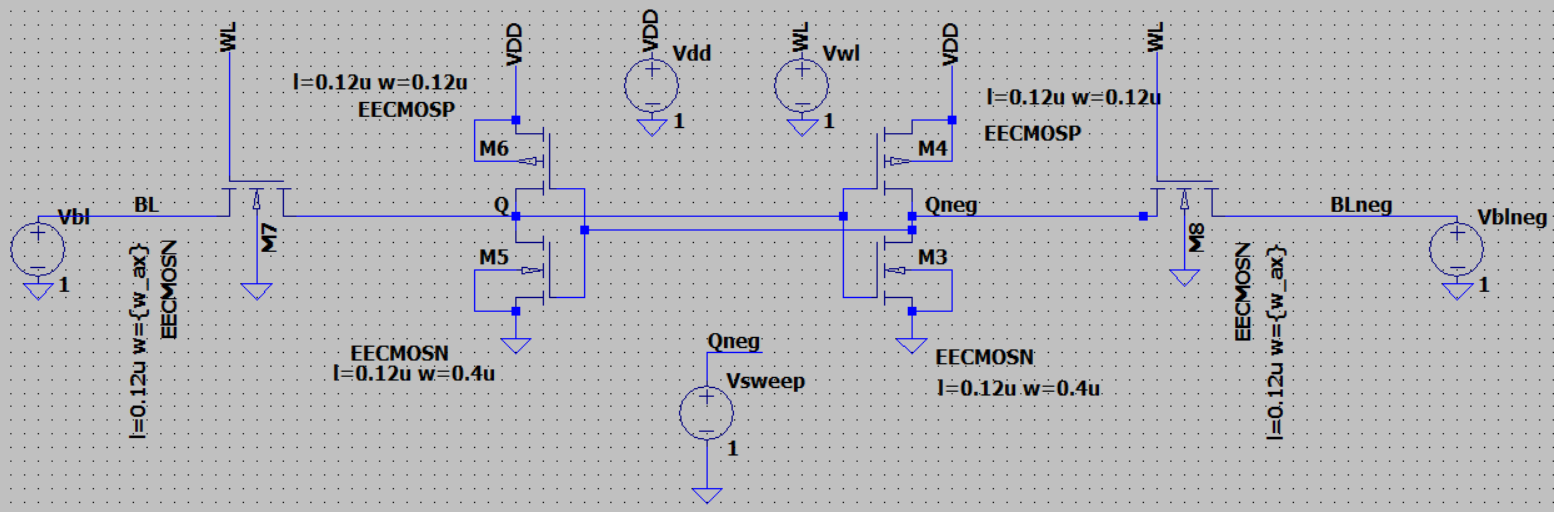

Successful/Total Simulations: 0/1
Raw file: data\standard\read\standard_read_1.raw, Log file: data\standard\read\standard_read_1.log
File opened successfully: data\standard\read\standard_read_1.raw
File updated successfully: ../../images/standard_read_simulation.png


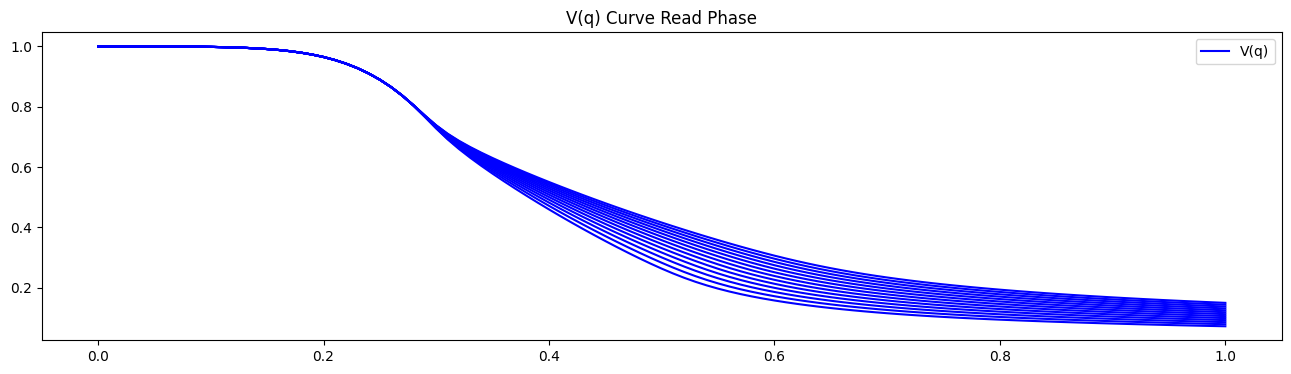

In [5]:
standard_read_netlist = load_asc(
                                     asc_file_path=os.path.join(ltspice, "standard/read/standard_read.asc"),
                                     schematic_image_path=os.path.join(schematics, "standard.png")
                                     )
vwl='1'; vbl='1'; vblneg='1'
standard_read_netlist.set_parameter('l_ax', l_ax_standard)
standard_read_netlist.set_parameter('l_pmos_q', l_pmos_q_standard)
standard_read_netlist.set_parameter('w_pmos_q', w_pmos_q_standard)
standard_read_netlist.set_parameter('l_nmos_q', l_nmos_q_standard)
standard_read_netlist.set_parameter('w_nmos_q', w_nmos_q_standard)
standard_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_standard)
standard_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_standard)
standard_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_standard)
standard_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_standard)
standard_read_netlist.set_parameter('vdd', vdd_standard)
standard_read_netlist.set_parameter('vwl', vwl)
standard_read_netlist.set_parameter('vbl', vbl)
standard_read_netlist.set_parameter('vblneg', vblneg)
standard_read_netlist.set_parameter('vsweep', vsweep_standard)
standard_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_standard,
                                        w_ax_step_param_standard,
                                        save_w_ax_standard
                                    )
standard_read_runner = SimRunner(output_folder=f"{data}/standard/read/")
standard_read_runner.run(netlist=standard_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(standard_read_runner.okSim) + '/' + str(standard_read_runner.runno))

standard_read_raw = ""
standard_read_log = ""
for standard_read_raw, standard_read_log in standard_read_runner:
    print("Raw file: %s, Log file: %s" % (standard_read_raw, standard_read_log))

standard_read_ltr = load_ltr(raw_file_path=standard_read_raw)
v_q_standard_read = standard_read_ltr.get_trace("V(q)")
vsweep_standard_read = standard_read_ltr.get_trace('vsweep')
steps = standard_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
plt.title("V(q) Curve Read Phase")
plt.legend(["V(q)"])
standard_read_simulation_path_image = os.path.join(images, "standard_read_simulation.png")
check_output_image(standard_read_simulation_path_image)
plt.savefig(standard_read_simulation_path_image)
plt.show()

w_ax_standard_read = [1.2e-07, 1.3e-07, 1.4e-07, 1.5e-07, 1.6e-07, 1.7e-07, 1.8e-07, 1.9e-07, 2e-07, 2.1e-07, 2.2e-07, 2.3e-07, 2.4e-07]
File updated successfully: ../../images/w_ax_standard_read.png


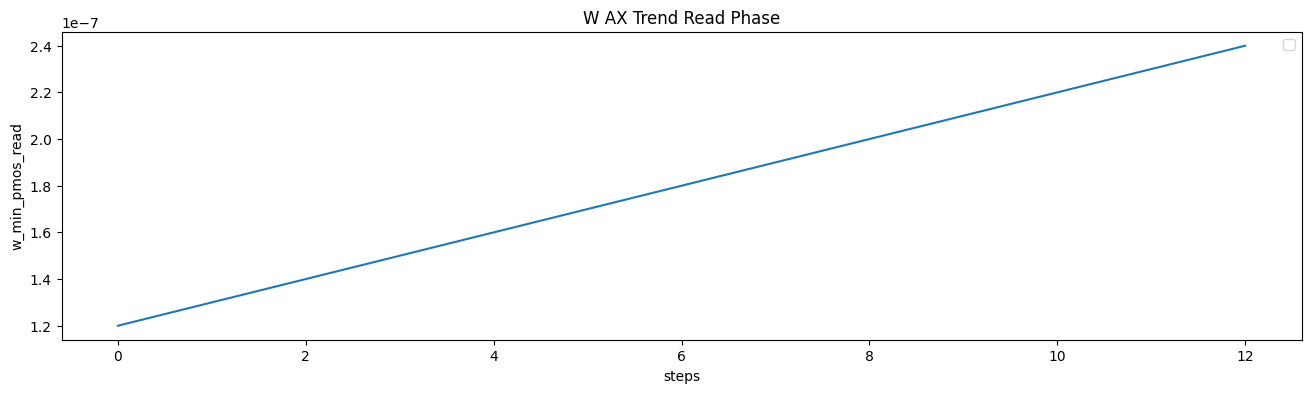

In [6]:
standard_read_log_file_path = f"./{standard_read_log}"

with open(standard_read_log_file_path, "r") as file:
    content = file.read()


w_ax_standard_read_data = re.search(w_ax_standard_pattern, content, re.DOTALL).group(1)
w_ax_standard_read_lines = w_ax_standard_read_data.strip().split('\n')[1:]
w_ax_standard_read = [float(line.split('\t')[1]) for line in w_ax_standard_read_lines]

print(f'w_ax_standard_read = {w_ax_standard_read}')
plt.figure(figsize=(16, 4))
plt.legend(['w_ax_standard_read'])
plt.plot(w_ax_standard_read, label='w_ax_standard_read')
plt.ylabel('w_min_pmos_read'); plt.xlabel('steps'); plt.title('W AX Trend Read Phase')
w_ax_standard_read_path_image = os.path.join(images, "w_ax_standard_read.png")
check_output_image(w_ax_standard_read_path_image)
plt.savefig(w_ax_standard_read_path_image)
plt.show()

File updated successfully: ../../images/butterfly_curve_standard_read.png


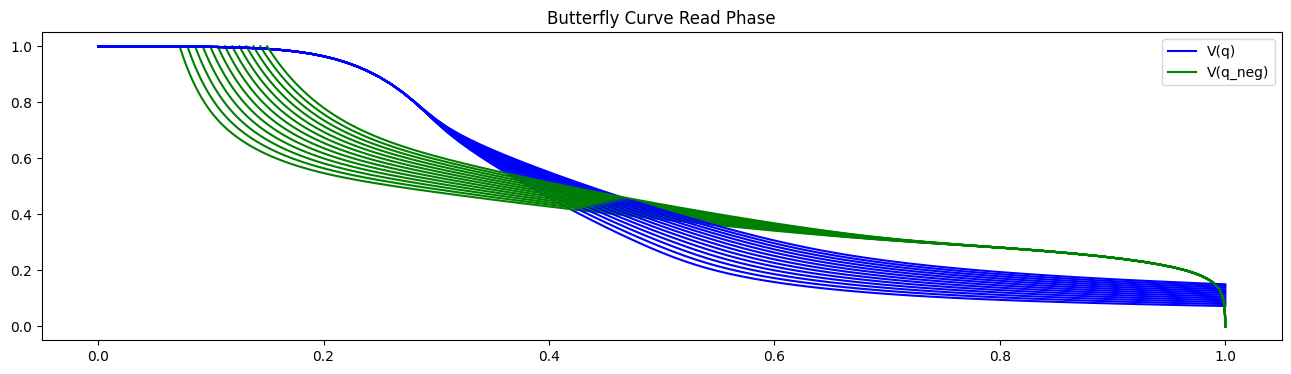

In [7]:
plt.figure(figsize=(16, 4))
for step in range(len(steps)):
    plt.plot(vsweep_standard_read.get_wave(step), v_q_standard_read.get_wave(step), label=steps[step], color='blue')
    plt.plot(v_q_standard_read.get_wave(step), vsweep_standard_read.get_wave(step), label=steps[step], color='green')
plt.title("Butterfly Curve Read Phase")
plt.legend(["V(q)", "V(q_neg)"])
butterfly_curve_standard_read_path_image = os.path.join(images, "butterfly_curve_standard_read.png")
check_output_image(butterfly_curve_standard_read_path_image)
plt.savefig(butterfly_curve_standard_read_path_image)
plt.show()

<h2>SNM Seevinck Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/hold/seevinck_hold.asc


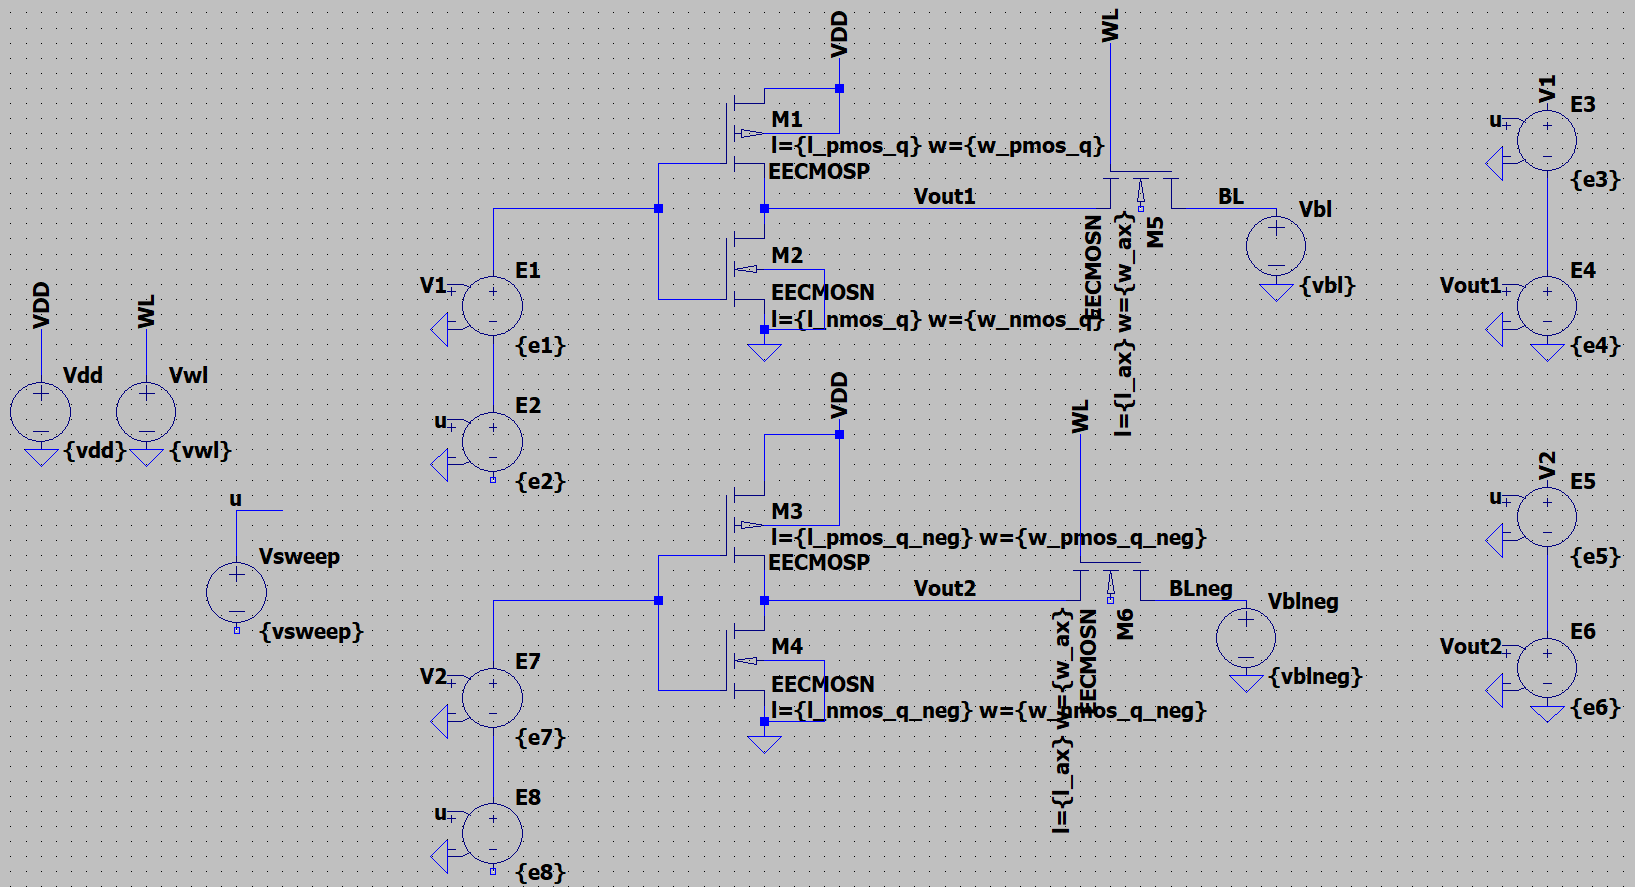

Successful/Total Simulations: 0/1
Raw file: data\seevinck\hold\seevinck_hold_1.raw, Log file: data\seevinck\hold\seevinck_hold_1.log
File opened successfully: data\seevinck\hold\seevinck_hold_1.raw
File updated successfully: ../../images/seevinck_hold_simulation.png


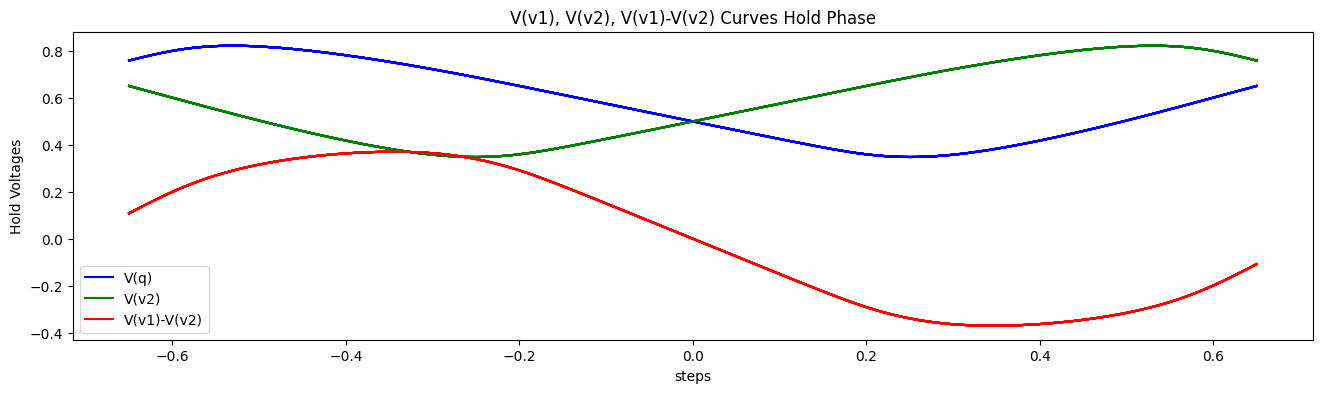

In [8]:
seevinck_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/hold/seevinck_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl='0'; vbl='1'; vblneg='1'
seevinck_hold_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_hold_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_hold_netlist.set_parameter('vwl', vwl)
seevinck_hold_netlist.set_parameter('vbl', vbl)
seevinck_hold_netlist.set_parameter('vblneg', vblneg)
seevinck_hold_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_hold_netlist.set_parameter('e1', e1_seevinck)
seevinck_hold_netlist.set_parameter('e2', e2_seevinck)
seevinck_hold_netlist.set_parameter('e3', e3_seevinck)
seevinck_hold_netlist.set_parameter('e4', e4_seevinck)
seevinck_hold_netlist.set_parameter('e5', e5_seevinck)
seevinck_hold_netlist.set_parameter('e6', e6_seevinck)
seevinck_hold_netlist.set_parameter('e7', e7_seevinck)
seevinck_hold_netlist.set_parameter('e8', e8_seevinck)
seevinck_hold_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_hold_runner = SimRunner(output_folder=f"{data}/seevinck/hold/")
seevinck_hold_runner.run(netlist=seevinck_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_hold_runner.okSim) + '/' + str(seevinck_hold_runner.runno))

seevinck_hold_raw = ""
seevinck_hold_log = ""
for seevinck_hold_raw, seevinck_hold_log in seevinck_hold_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_hold_raw, seevinck_hold_log))

seevinck_hold_ltr = load_ltr(raw_file_path=seevinck_hold_raw)
v_1_seevinck_hold = seevinck_hold_ltr.get_trace("V(v1)")
v_2_seevinck_hold = seevinck_hold_ltr.get_trace("V(v2)")
vsweep_seevinck_hold = seevinck_hold_ltr.get_trace('vsweep')
steps = seevinck_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
v1 = []
v2 = []
v1_minus_v2 = []
for step in range(len(steps)):
    v1_curr_value = v_1_seevinck_hold.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_seevinck_hold.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    plt.plot(vsweep_seevinck_hold.get_wave(step), v1_curr_value, label=steps[step], color='blue')
    plt.plot(vsweep_seevinck_hold.get_wave(step), v2_curr_value, label=steps[step], color='green')
    plt.plot(vsweep_seevinck_hold.get_wave(step), v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
seevinck_hold_simulation_path_image = os.path.join(images, "seevinck_hold_simulation.png")
check_output_image(seevinck_hold_simulation_path_image)
plt.savefig(seevinck_hold_simulation_path_image)
plt.show()

w_ax       SNM(HOLD)                     
0.12 u     0.37036505341529846 mV        
0.13 u     0.37036487460136414 mV        
0.14 u     0.3703647255897522 mV         
0.15 u     0.37036457657814026 mV        
0.16 u     0.37036439776420593 mV        
0.17 u     0.3703642189502716 mV         
0.18 u     0.3703640401363373 mV         
0.19 u     0.37036386132240295 mV        
0.20 u     0.37036368250846863 mV        
0.21 u     0.3703634738922119 mV         
0.22 u     0.3703632950782776 mV         
0.23 u     0.3703630864620209 mV         
0.24 u     0.37036287784576416 mV        
File updated successfully: ../../images/seevinck_snm_hold_trend.png


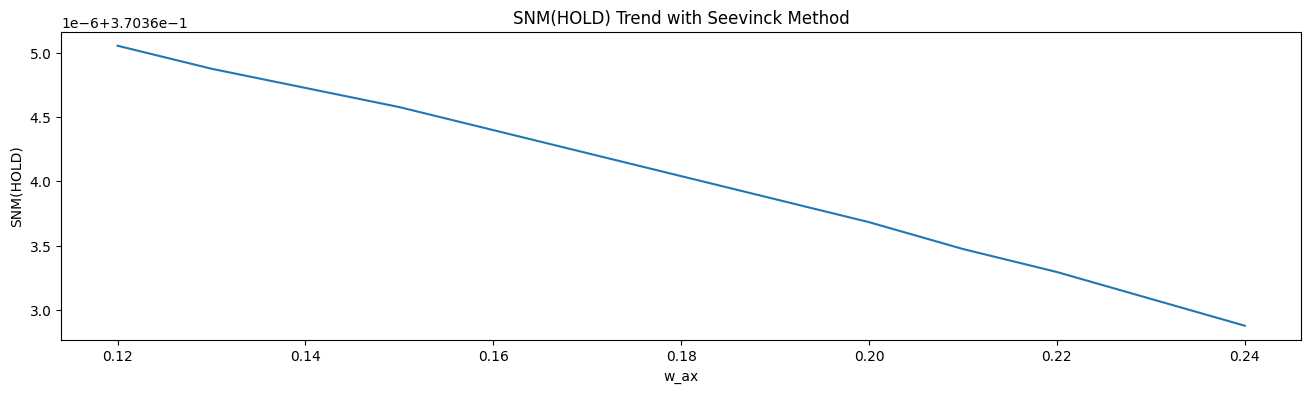

In [9]:
from properties import w_ax_start_seevinck, w_ax_step_seevinck

plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("w_ax", "SNM(HOLD)"))

w_ax_start_seevinck = float(w_ax_start_seevinck.replace('u', ''))
w_ax_step_seevinck = float(w_ax_step_seevinck.replace('u', ''))
w_ax_seevinck_i_value = 0
w_ax_hold_seevinck = []
snm_hold_seevinck = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    w_ax_seevinck_curr_value = w_ax_start_seevinck + w_ax_seevinck_i_value
    w_ax_hold_seevinck.append(w_ax_seevinck_curr_value)
    w_ax_seevinck_i_value = w_ax_seevinck_i_value + w_ax_step_seevinck
    formatted_w_ax_seevinck = "{:.2f}".format(w_ax_seevinck_curr_value)
    snm_hold_curr = max(v1_minus_v2_curr_array)
    snm_hold_seevinck.append(snm_hold_curr)
    print("{:<10} {:<30}".format(f'{formatted_w_ax_seevinck} u', f'{snm_hold_curr} mV'))
    
plt.plot(w_ax_hold_seevinck, snm_hold_seevinck)
plt.title("SNM(HOLD) Trend with Seevinck Method")
plt.xlabel("w_ax"); plt.ylabel("SNM(HOLD)")
seevinck_snm_hold_trend_path_image = os.path.join(images, "seevinck_snm_hold_trend.png")
check_output_image(seevinck_snm_hold_trend_path_image)
plt.savefig(seevinck_snm_hold_trend_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/seevinck/read/seevinck_read.asc


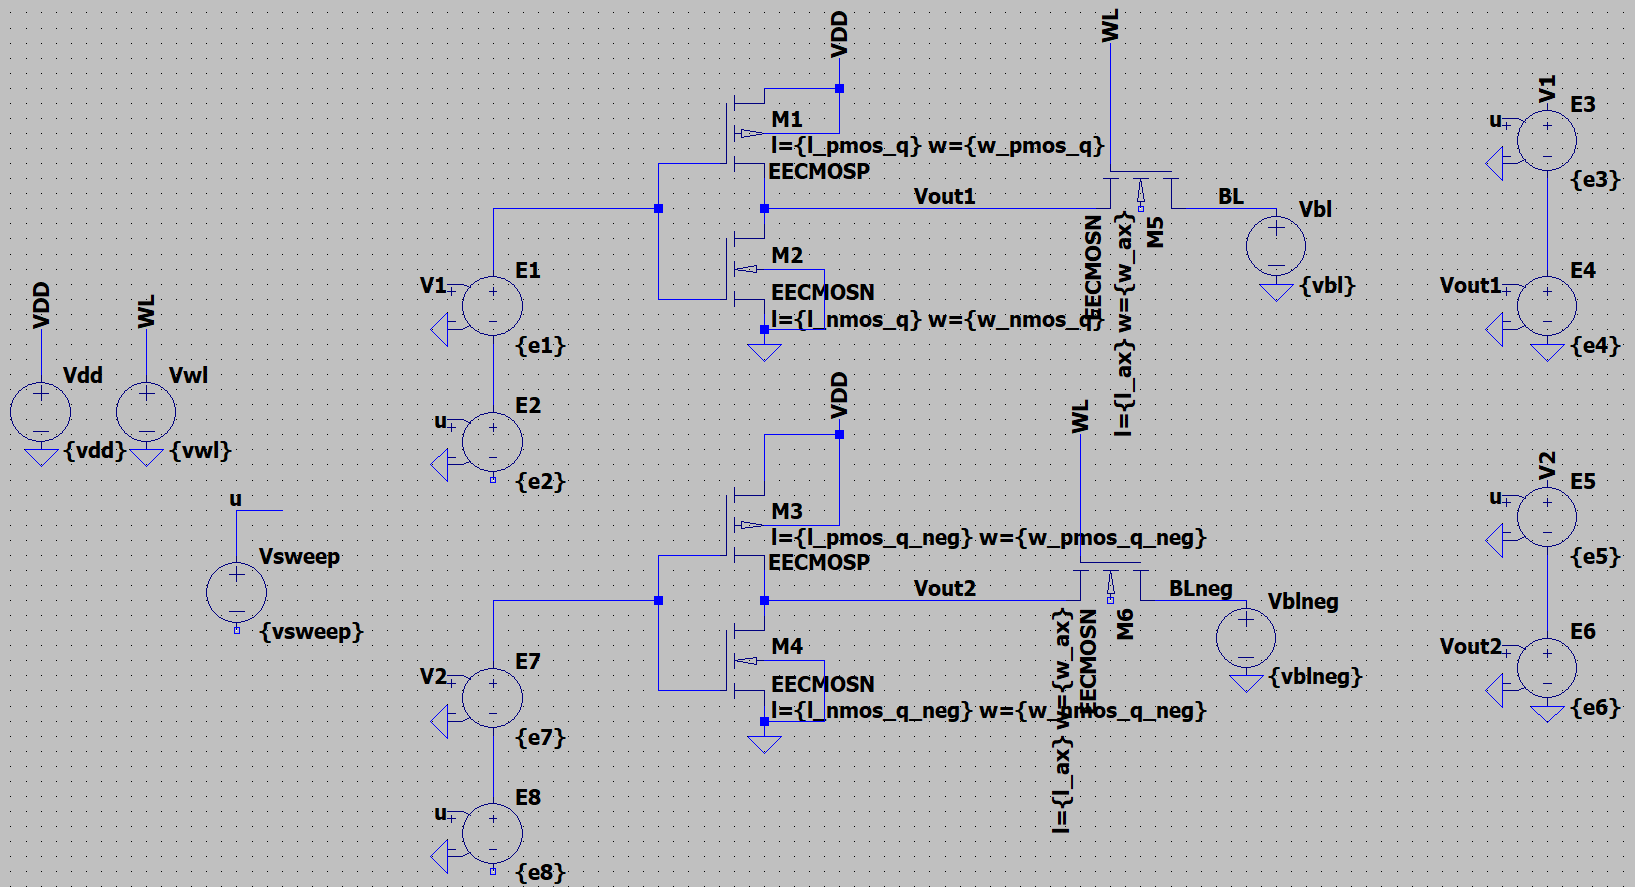

Successful/Total Simulations: 0/1
Raw file: data\seevinck\read\seevinck_read_1.raw, Log file: data\seevinck\read\seevinck_read_1.log
File opened successfully: data\seevinck\read\seevinck_read_1.raw
File updated successfully: ../../images/seevinck_read_simulation.png


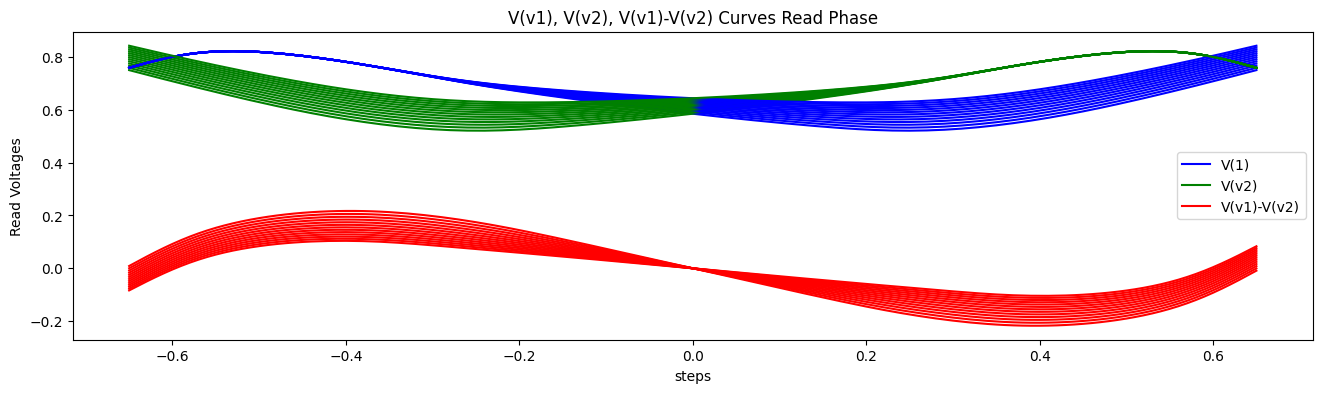

In [10]:
seevinck_read_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "seevinck/read/seevinck_read.asc"),
                                schematic_image_path=os.path.join(schematics, "seevinck.png")
                                )
vwl='1'; vbl='1'; vblneg='1'
seevinck_read_netlist.set_parameter('l_ax', l_ax_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q', l_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q', w_pmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q', l_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q', w_nmos_q_seevinck)
seevinck_read_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_seevinck)
seevinck_read_netlist.set_parameter('vdd', vdd_seevinck)
seevinck_read_netlist.set_parameter('vwl', vwl)
seevinck_read_netlist.set_parameter('vbl', vbl)
seevinck_read_netlist.set_parameter('vblneg', vblneg)
seevinck_read_netlist.set_parameter('vsweep', vsweep_seevinck)
seevinck_read_netlist.set_parameter('e1', e1_seevinck)
seevinck_read_netlist.set_parameter('e2', e2_seevinck)
seevinck_read_netlist.set_parameter('e3', e3_seevinck)
seevinck_read_netlist.set_parameter('e4', e4_seevinck)
seevinck_read_netlist.set_parameter('e5', e5_seevinck)
seevinck_read_netlist.set_parameter('e6', e6_seevinck)
seevinck_read_netlist.set_parameter('e7', e7_seevinck)
seevinck_read_netlist.set_parameter('e8', e8_seevinck)
seevinck_read_netlist.add_instructions(
                                        rit_models,
                                        dc_vsweep_seevinck,
                                        w_ax_step_param_seevinck,
                                        save_w_ax_seevinck
                                    )
seevinck_read_runner = SimRunner(output_folder=f"{data}/seevinck/read/")
seevinck_read_runner.run(netlist=seevinck_read_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(seevinck_read_runner.okSim) + '/' + str(seevinck_read_runner.runno))

seevinck_read_raw = ""
seevinck_read_log = ""
for seevinck_read_raw, seevinck_read_log in seevinck_read_runner:
    print("Raw file: %s, Log file: %s" % (seevinck_read_raw, seevinck_read_log))

seevinck_read_ltr = load_ltr(raw_file_path=seevinck_read_raw)
v_1_seevinck_read = seevinck_read_ltr.get_trace("V(v1)")
v_2_seevinck_read = seevinck_read_ltr.get_trace("V(v2)")
vsweep_seevinck_read = seevinck_read_ltr.get_trace('vsweep')
steps = seevinck_read_ltr.get_steps()

plt.figure(figsize=(16, 4))
v1 = []
v2 = []
v1_minus_v2 = []
for step in range(len(steps)):
    v1_curr_value = v_1_seevinck_read.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_seevinck_read.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    plt.plot(vsweep_seevinck_read.get_wave(step), v1_curr_value, label=steps[step], color='blue')
    plt.plot(vsweep_seevinck_read.get_wave(step), v2_curr_value, label=steps[step], color='green')
    plt.plot(vsweep_seevinck_read.get_wave(step), v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Read Phase")
plt.xlabel("steps"); plt.ylabel("Read Voltages")
plt.legend(["V(1)", "V(v2)", "V(v1)-V(v2)"])
seevinck_read_simulation_path_image = os.path.join(images, "seevinck_read_simulation.png")
check_output_image(seevinck_read_simulation_path_image)
plt.savefig(seevinck_read_simulation_path_image)
plt.show()

w_ax       SNM(READ)                     
0.12 u     0.21706634759902954 mV        
0.13 u     0.20578378438949585 mV        
0.14 u     0.19491922855377197 mV        
0.15 u     0.18443912267684937 mV        
0.16 u     0.17431825399398804 mV        
0.17 u     0.1645340919494629 mV         
0.18 u     0.15506672859191895 mV        
0.19 u     0.14589804410934448 mV        
0.20 u     0.13701152801513672 mV        
0.21 u     0.12839221954345703 mV        
0.22 u     0.12002629041671753 mV        
0.23 u     0.1119011640548706 mV         
0.24 u     0.1040048599243164 mV         
File updated successfully: ../../images/seevinck_snm_read_trend.png


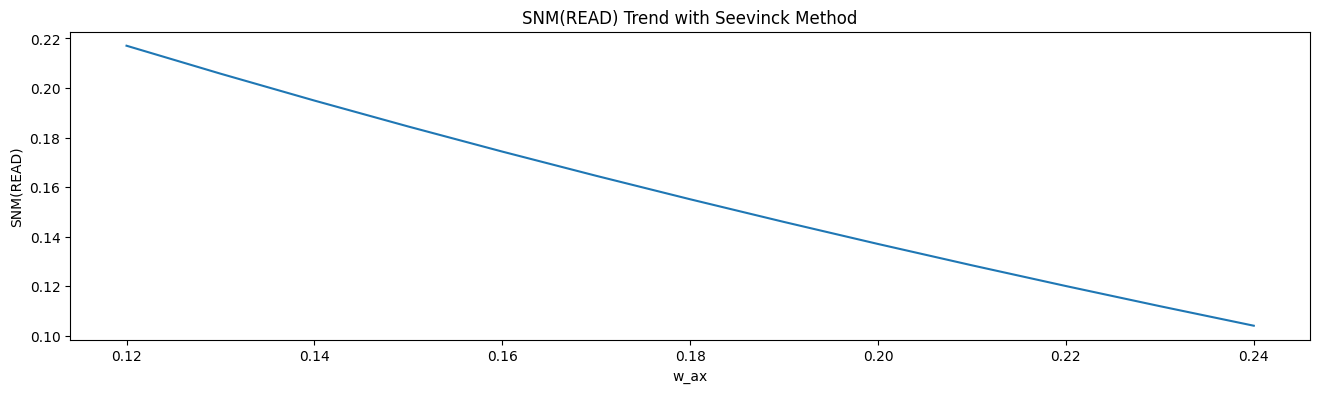

In [11]:
from properties import w_ax_start_seevinck, w_ax_step_seevinck

plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("w_ax", "SNM(READ)"))

w_ax_start_seevinck = float(w_ax_start_seevinck.replace('u', ''))
w_ax_step_seevinck = float(w_ax_step_seevinck.replace('u', ''))
w_ax_seevinck_i_value = 0
w_ax_read_seevinck = []
snm_read_seevinck = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    w_ax_seevinck_curr_value = w_ax_start_seevinck + w_ax_seevinck_i_value
    w_ax_read_seevinck.append(w_ax_seevinck_curr_value)
    w_ax_seevinck_i_value = w_ax_seevinck_i_value + w_ax_step_seevinck
    formatted_w_ax_seevinck = "{:.2f}".format(w_ax_seevinck_curr_value)
    snm_read_curr = max(v1_minus_v2_curr_array)
    snm_read_seevinck.append(snm_read_curr)
    print("{:<10} {:<30}".format(f'{formatted_w_ax_seevinck} u', f'{snm_read_curr} mV'))
plt.plot(w_ax_read_seevinck, snm_read_seevinck)
plt.title("SNM(READ) Trend with Seevinck Method")
plt.xlabel("w_ax"); plt.ylabel("SNM(READ)")
seevinck_snm_read_trend_path_image = os.path.join(images, "seevinck_snm_read_trend.png")
check_output_image(seevinck_snm_read_trend_path_image)
plt.savefig(seevinck_snm_read_trend_path_image)
plt.show()

<h2>Gaussian VTH Analysis</h2>

<h3>Hold Phase SRAM 6T</h3>

File opened successfully: ../../ltspice/models/gaussian-vth/hold/gaussian_vth_hold.asc


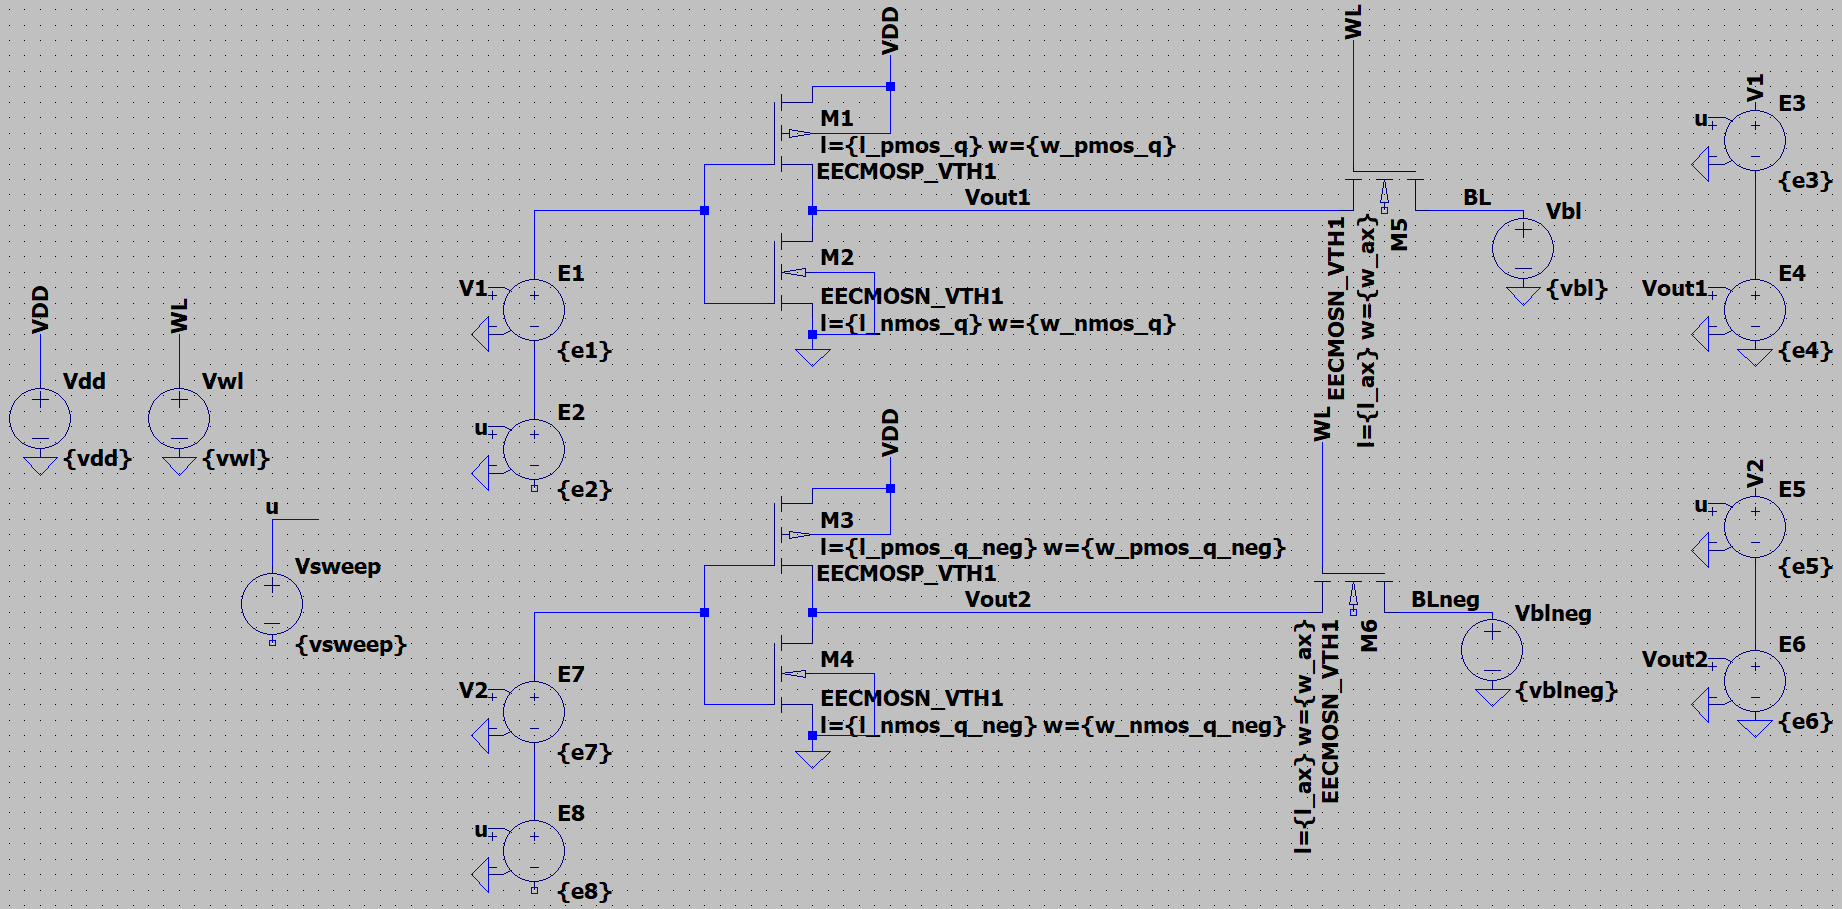

Successful/Total Simulations: 0/1
Raw file: data\gaussian-vth\hold\gaussian_vth_hold_1.raw, Log file: data\gaussian-vth\hold\gaussian_vth_hold_1.log
File opened successfully: data\gaussian-vth\hold\gaussian_vth_hold_1.raw
File not found: ../../images/gaussian_vth_hold_simulation.png
File created successfully: ../../images/gaussian_vth_hold_simulation.png


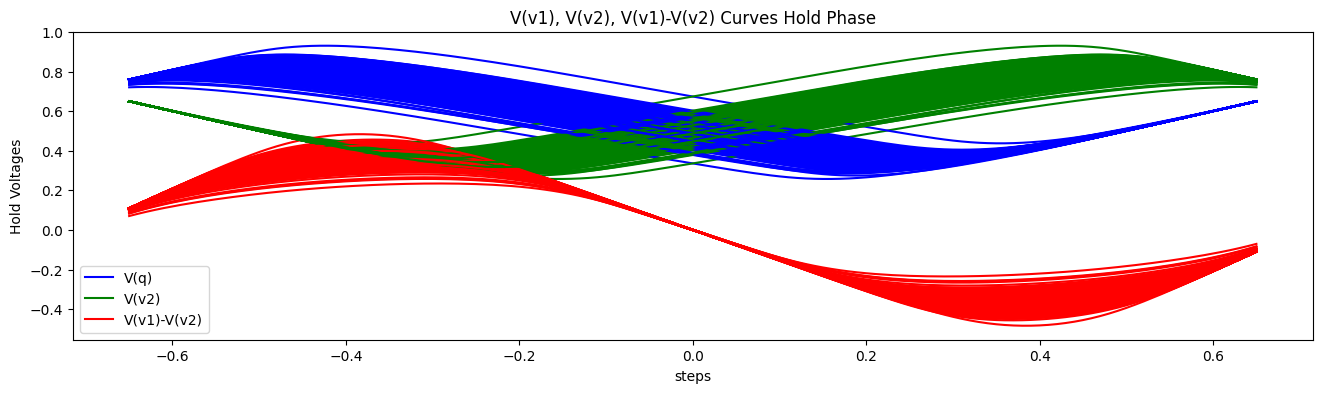

In [12]:
gaussian_vth_hold_netlist = load_asc(
                                asc_file_path=os.path.join(ltspice, "gaussian-vth/hold/gaussian_vth_hold.asc"),
                                schematic_image_path=os.path.join(schematics, "gaussian_vth.png")
                                )
vwl='0'; vbl='1'; vblneg='1'
gaussian_vth_hold_netlist.set_parameter('l_ax', l_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_ax', w_ax_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q', l_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q', w_pmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q', l_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q', w_nmos_q_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_pmos_q_neg', l_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_pmos_q_neg', w_pmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('l_nmos_q_neg', l_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('w_nmos_q_neg', w_nmos_q_neg_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vdd', vdd_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('vwl', vwl)
gaussian_vth_hold_netlist.set_parameter('vbl', vbl)
gaussian_vth_hold_netlist.set_parameter('vblneg', vblneg)
gaussian_vth_hold_netlist.set_parameter('vsweep', vsweep_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e1', e1_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e2', e2_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e3', e3_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e4', e4_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e5', e5_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e6', e6_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e7', e7_gaussian_vth)
gaussian_vth_hold_netlist.set_parameter('e8', e8_gaussian_vth)
gaussian_vth_hold_netlist.add_instructions(
                                        rit_models_montecarlo,
                                        dc_vsweep_gaussian_vth,
                                        step_param_run_gaussian_vth
                                    )
gaussian_vth_hold_runner = SimRunner(output_folder=f"{data}/gaussian-vth/hold/")
gaussian_vth_hold_runner.run(netlist=gaussian_vth_hold_netlist, timeout=3600)
print('Successful/Total Simulations: ' + str(gaussian_vth_hold_runner.okSim) + '/' + str(gaussian_vth_hold_runner.runno))

gaussian_vth_hold_raw = ""
gaussian_vth_hold_log = ""
for gaussian_vth_hold_raw, gaussian_vth_hold_log in gaussian_vth_hold_runner:
    print("Raw file: %s, Log file: %s" % (gaussian_vth_hold_raw, gaussian_vth_hold_log))

gaussian_vth_hold_ltr = load_ltr(raw_file_path=gaussian_vth_hold_raw)
v_1_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v1)")
v_2_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace("V(v2)")
vsweep_gaussian_vth_hold = gaussian_vth_hold_ltr.get_trace('vsweep')
steps = gaussian_vth_hold_ltr.get_steps()

plt.figure(figsize=(16, 4))
v1 = []
v2 = []
v1_minus_v2 = []
for step in range(len(steps)):
    v1_curr_value = v_1_gaussian_vth_hold.get_wave(step)
    v1.append(v1_curr_value)
    v2_curr_value = v_2_gaussian_vth_hold.get_wave(step)
    v2.append(v2_curr_value)
    v1_minus_v2_curr_value = v1_curr_value - v2_curr_value
    v1_minus_v2.append(v1_minus_v2_curr_value)
    plt.plot(vsweep_gaussian_vth_hold.get_wave(step), v1_curr_value, label=steps[step], color='blue')
    plt.plot(vsweep_gaussian_vth_hold.get_wave(step), v2_curr_value, label=steps[step], color='green')
    plt.plot(vsweep_gaussian_vth_hold.get_wave(step), v1_minus_v2_curr_value, label=steps[step], color='red')
plt.title("V(v1), V(v2), V(v1)-V(v2) Curves Hold Phase")
plt.xlabel("steps"); plt.ylabel("Hold Voltages")
plt.legend(["V(q)", "V(v2)", "V(v1)-V(v2)"])
gaussian_vth_hold_simulation_path_image = os.path.join(images, "gaussian_vth_hold_simulation.png")
check_output_image(gaussian_vth_hold_simulation_path_image)
plt.savefig(gaussian_vth_hold_simulation_path_image)
plt.show()

V_TH       SNM(HOLD)                     
<class 'ValueError'> u 0.34377580881118774 mV        
<class 'ValueError'> u 0.39029496908187866 mV        
<class 'ValueError'> u 0.37333908677101135 mV        
<class 'ValueError'> u 0.36191657185554504 mV        
<class 'ValueError'> u 0.4564790725708008 mV         
<class 'ValueError'> u 0.386444628238678 mV          
<class 'ValueError'> u 0.3752814531326294 mV         
<class 'ValueError'> u 0.2989484369754791 mV         
<class 'ValueError'> u 0.32829272747039795 mV        
<class 'ValueError'> u 0.3578607738018036 mV         
<class 'ValueError'> u 0.3118135333061218 mV         
<class 'ValueError'> u 0.34247347712516785 mV        
<class 'ValueError'> u 0.33573219180107117 mV        
<class 'ValueError'> u 0.388624906539917 mV          
<class 'ValueError'> u 0.36101967096328735 mV        
<class 'ValueError'> u 0.3528343737125397 mV         
<class 'ValueError'> u 0.39462947845458984 mV        
<class 'ValueError'> u 0.354885041713714

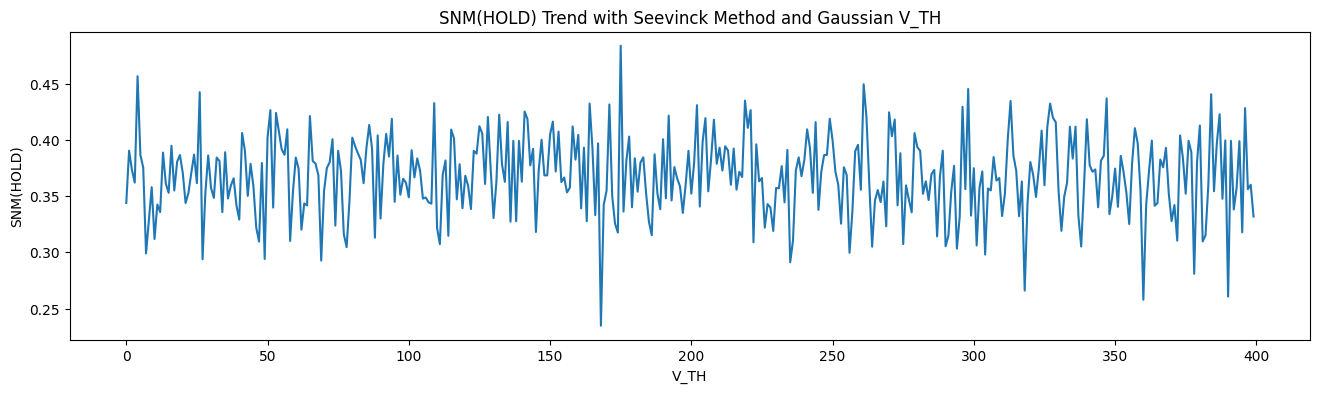

In [13]:
plt.figure(figsize=(16, 4))
print("{:<10} {:<30}".format("V_TH", "SNM(HOLD)"))

v_th_hold_gaussian_vth = []
snm_hold_gaussian_vth = []

for i_array, v1_minus_v2_array in enumerate(v1_minus_v2):
    v1_minus_v2_curr_array = abs(v1_minus_v2_array)
    
    snm_hold_curr = max(v1_minus_v2_curr_array)
    snm_hold_gaussian_vth.append(snm_hold_curr)
    print("{:<10} {:<30}".format(f'{ValueError} u', f'{snm_hold_curr} mV'))

plt.plot(snm_hold_gaussian_vth)  
# plt.plot(w_ax_hold_seevinck, snm_hold_seevinck)
plt.title("SNM(HOLD) Trend with Seevinck Method and Gaussian V_TH")
plt.xlabel("V_TH"); plt.ylabel("SNM(HOLD)")
gaussian_vth_snm_hold_trend_path_image = os.path.join(images, "gaussian_vth_snm_hold_trend.png")
check_output_image(gaussian_vth_snm_hold_trend_path_image)
plt.savefig(gaussian_vth_snm_hold_trend_path_image)
plt.show()

File updated successfully: ../../images/gaussian_vth_snm_hold_hystogram.png


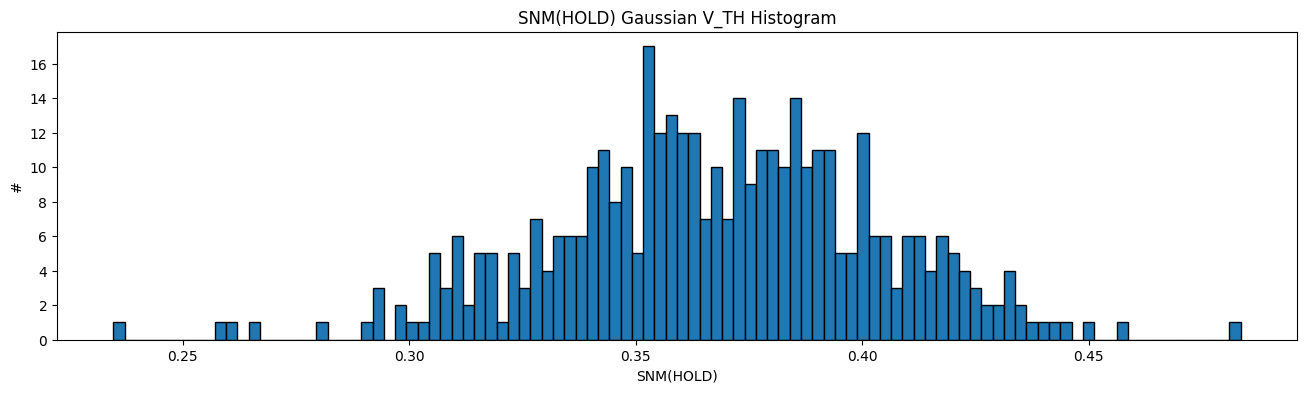

In [18]:
plt.figure(figsize=(16, 4))
plt.hist(snm_hold_gaussian_vth, bins=100, edgecolor='black')
plt.xlabel("SNM(HOLD)"); plt.ylabel("#") 
plt.title("SNM(HOLD) Gaussian V_TH Histogram")
gaussian_vth_snm_hold_hystogram_path_image = os.path.join(images, "gaussian_vth_snm_hold_hystogram.png")
check_output_image(gaussian_vth_snm_hold_hystogram_path_image)
plt.savefig(gaussian_vth_snm_hold_hystogram_path_image)
plt.show()

<h3>Read Phase SRAM 6T</h3>